# Análise Exploratória e Pré-processamento de Dados - COVID-19

**Aluna:** Fernanda dos Santos Soares
**Matrícula:** 4052024001383

Este projeto tem como objetivo aplicar conceitos de análise exploratória e pré-processamento de dados a partir de bases reais sobre a pandemia de COVID-19, abordando estatísticas descritivas, visualizações e transformação dos dados para uso posterior em modelos de análise ou previsão.

As bases utilizadas foram extraídas do Kaggle:
- [`covid_worldwide.csv`](https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset)
- [`country_vaccinations_by_manufacturer.csv`](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress)


## Definição do Problema

Trata-se de um problema **não supervisionado**, em que o objetivo é compreender o comportamento da pandemia da COVID-19 em diferentes países.

**Perguntas norteadoras**:
- Quais países concentram o maior número de casos?
- Há correlação entre número de casos, população e testagem?
- Como está a distribuição das vacinas por país e fabricante?

**Premissas/Hipóteses**:
- Populações maiores tendem a ter mais casos absolutos.
- A testagem influencia o número de casos identificados.
- Há diferenças regionais importantes nos dados.

**Restrição**: serão considerados apenas os dados agregados por país.

**Definição dos atributos principais** (do `covid_worldwide.csv`):
- `Country`: nome do país
- `Total Cases`: total de casos confirmados
- `Total Deaths`: total de mortes
- `Total Recovered`: total de recuperados
- `Active Cases`: casos ativos no momento
- `Total Test`: total de testes realizados
- `Population`: população estimada


## 3. Pré-processamento e Tratamento Inicial dos Dados

Nesta etapa realizei a limpeza e transformação dos dados brutos, preparando-os para análise estatística e visual.

**Etapas realizadas:**
- Conversão de colunas com vírgulas para float
- Verificação de valores ausentes
- Criação de variáveis normalizadas por 100 mil habitantes
- Identificação de outliers com boxplots
- Padronização (z-score)
- Discretização por quartis para categorizar a gravidade dos países


As transformações aplicadas foram fundamentais para garantir a qualidade da análise exploratória posterior. A padronização permite comparações em uma mesma escala e a discretização auxilia na segmentação qualitativa dos países. Os dados estão agora prontos para serem utilizados em análises estatísticas, visualizações avançadas ou modelos preditivos futuros.





**3.1 Conversão de colunas numéricas com vírgulas**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

# Leitura do dataset
df = pd.read_csv("covid_worldwide.csv")

# Lista de colunas a converter
cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']

# Conversão para float
for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')


**3.2 Verificação de valores ausentes**

In [13]:
df[cols].isna().sum()


,0
Total Cases,0
Total Deaths,6
Total Recovered,21
Active Cases,19
Total Test,18
Population,3


> O resultado mostra valores ausentes principalmente em `Total Test`, `Total Recovered` e `Active Cases`. Esses dados podem ter sido omitidos por falta de testes ou por políticas de notificação distintas em alguns países. Vou manter os registros, tratando os valores como ausentes na análise estatística.


**3.3 Visualização de outliers em valores absolutos**

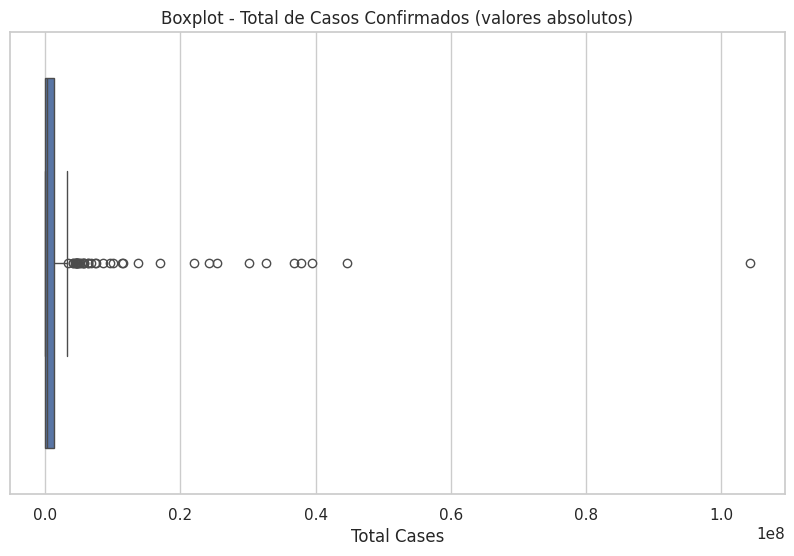

In [17]:
# Boxplot do total de casos absolutos
sns.boxplot(data=df, x='Total Cases')
plt.title('Boxplot - Total de Casos Confirmados (valores absolutos)')
plt.show()



> O boxplot acima indica a existência de outliers — países com número total de casos confirmados extremamente altos em relação à maioria. Esses valores podem distorcer a análise descritiva e devem ser considerados com cautela.



**3.4 Criação de colunas normalizadas por 100 mil habitantes**

In [18]:
# Cálculo das colunas per capita (por 100 mil habitantes)
for col in ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']:
    df[col + ' per 100k'] = (df[col] / df['Population']) * 100_000

df[['Country'] + [c for c in df.columns if 'per 100k' in c]].head()


,Country,Total Cases per 100k,Total Deaths per 100k,Total Recovered per 100k,Active Cases per 100k
0,USA,31121.631183,338.386252,30263.197262,520.047670
1,India,3176.580023,37.731268,3138.723990,0.124766
2,France,60264.696921,250.414282,59868.620213,145.662426
3,Germany,45038.404171,197.548756,44583.329499,257.525917
4,Brazil,17099.589325,323.688122,16679.253640,96.647563


> Para permitir comparações mais justas entre os países, criei novas colunas com os valores normalizados por 100 mil habitantes. Assim, evitamos distorções causadas por diferenças populacionais.


**3.5 Visualização de outliers per capita**

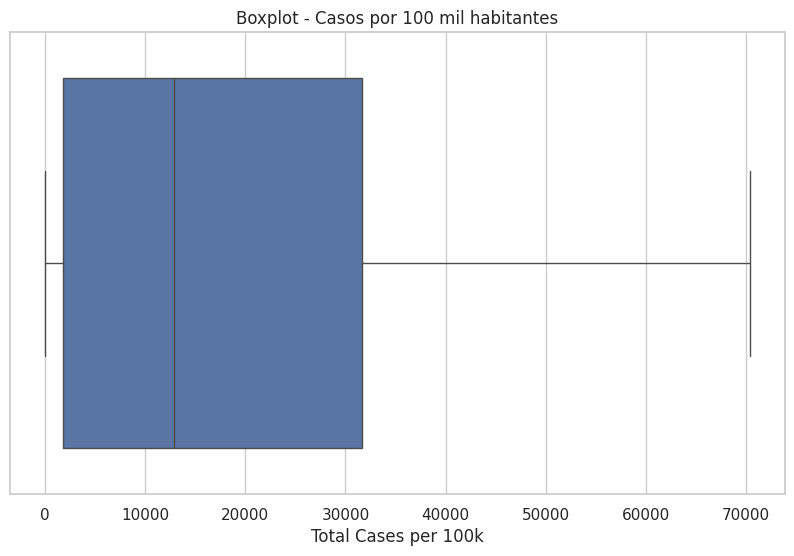

In [19]:
# Boxplot dos casos por 100 mil habitantes
sns.boxplot(data=df, x='Total Cases per 100k')
plt.title('Boxplot - Casos por 100 mil habitantes')
plt.show()


> Mesmo após a normalização por população, ainda observa-se países com taxas muito altas de infecção. Esses outliers indicam situações críticas e devem ser observados separadamente nas análises posteriores.


**3.6 Padronização (z-score) das variáveis normalizadas**

In [20]:
from sklearn.preprocessing import StandardScaler

# Padronização z-score
features = [c for c in df.columns if 'per 100k' in c]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled[features].head()


,Total Cases per 100k,Total Deaths per 100k,Total Recovered per 100k,Active Cases per 100k
0,0.594144,1.682520,0.687987,-0.177844
1,-0.838539,-0.683338,-0.779078,-0.276407
2,2.088247,0.990268,2.289238,-0.248817
3,1.307628,0.574268,1.462512,-0.227611
4,-0.124736,1.566860,-0.046720,-0.258109


> As variáveis normalizadas foram padronizadas com o método z-score (média = 0, desvio padrão = 1), permitindo que sejam comparadas em uma mesma escala e utilizadas futuramente em técnicas que dependem de distância (como agrupamentos e PCA).


**3.7 Discretização por quartis (variável categórica Gravidade)**

In [21]:
# Classificação dos países por gravidade dos casos
df['Gravidade'] = pd.qcut(df['Total Cases per 100k'], q=4, labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

df[['Country', 'Total Cases per 100k', 'Gravidade']].sort_values(by='Total Cases per 100k', ascending=False).head()


,Country,Total Cases per 100k,Gravidade
164,Faeroe Islands,70395.872687,Muito Alto
173,San Marino,68731.113393,Muito Alto
22,Austria,63752.221037,Muito Alto
56,Slovenia,63610.701269,Muito Alto
105,Brunei,61787.347535,Muito Alto


> A criação da variável categórica `Gravidade`, baseada nos quartis da taxa de casos por 100 mil habitantes, permite classificar os países em quatro grupos. Isso facilitará comparações qualitativas e visualizações futuras por faixa de severidade.


**3.8 Encerramento da etapa de pré-processamento**

> Com o tratamento inicial finalizado, o conjunto de dados agora possui valores numéricos consistentes, atributos per capita comparáveis, variáveis padronizadas e uma classificação categórica útil. Estamos prontos para avançar para a etapa de análise descritiva e visualizações.


## 4. ANÁLISE ESTATÍSTICA DESCRITIVA

In [2]:
# Estatísticas básicas
df[cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Total Cases,231.0,2.923460e+06,9.479286e+06,5.0,24001.0,206592.0,1296145.50,1.041969e+08
Total Deaths,225.0,3.005778e+04,1.053806e+05,1.0,223.0,2179.0,14452.00,1.132935e+06
Total Recovered,210.0,2.993905e+06,9.520209e+06,2.0,21972.5,235145.5,1465768.50,1.013228e+08
Active Cases,212.0,9.099885e+04,7.663888e+05,0.0,52.5,1115.0,10228.75,1.095262e+07
Total Test,213.0,3.249316e+07,1.177370e+08,7850.0,347815.0,2216193.0,12984257.00,1.159833e+09
Population,228.0,2.849326e+07,1.022803e+08,799.0,445081.5,5676382.5,21707591.00,1.406632e+09


> A análise mostra grande disparidade entre países. Há casos com mais de 100 milhões de infectados (EUA), enquanto outros têm menos de 10 mil. A média de casos ativos é enviesada por outliers. O desvio-padrão elevado indica alta dispersão.

A presença de valores ausentes é identificada abaixo:


In [3]:
# Valores ausentes
df[cols].isna().sum()


,0
Total Cases,0
Total Deaths,6
Total Recovered,21
Active Cases,19
Total Test,18
Population,3


## 4.1 Interpretação do resumo estatístico

A análise descritiva dos dados numéricos mostra que os países possuem níveis muito diferentes de casos e mortes por COVID-19. A média de casos por 100 mil habitantes é significativamente superior à mediana, o que indica uma distribuição assimétrica, com muitos países registrando valores baixos e poucos países com valores extremamente altos (outliers).

O desvio padrão elevado nas colunas normalizadas confirma essa alta variabilidade. A presença de valores ausentes em algumas colunas também mostra a necessidade de cautela na análise de variáveis como `Total Test` ou `Total Recovered`, cujos dados nem sempre foram informados de maneira consistente pelos países.



## 5. VISUALIZAÇÃO DOS DADOS

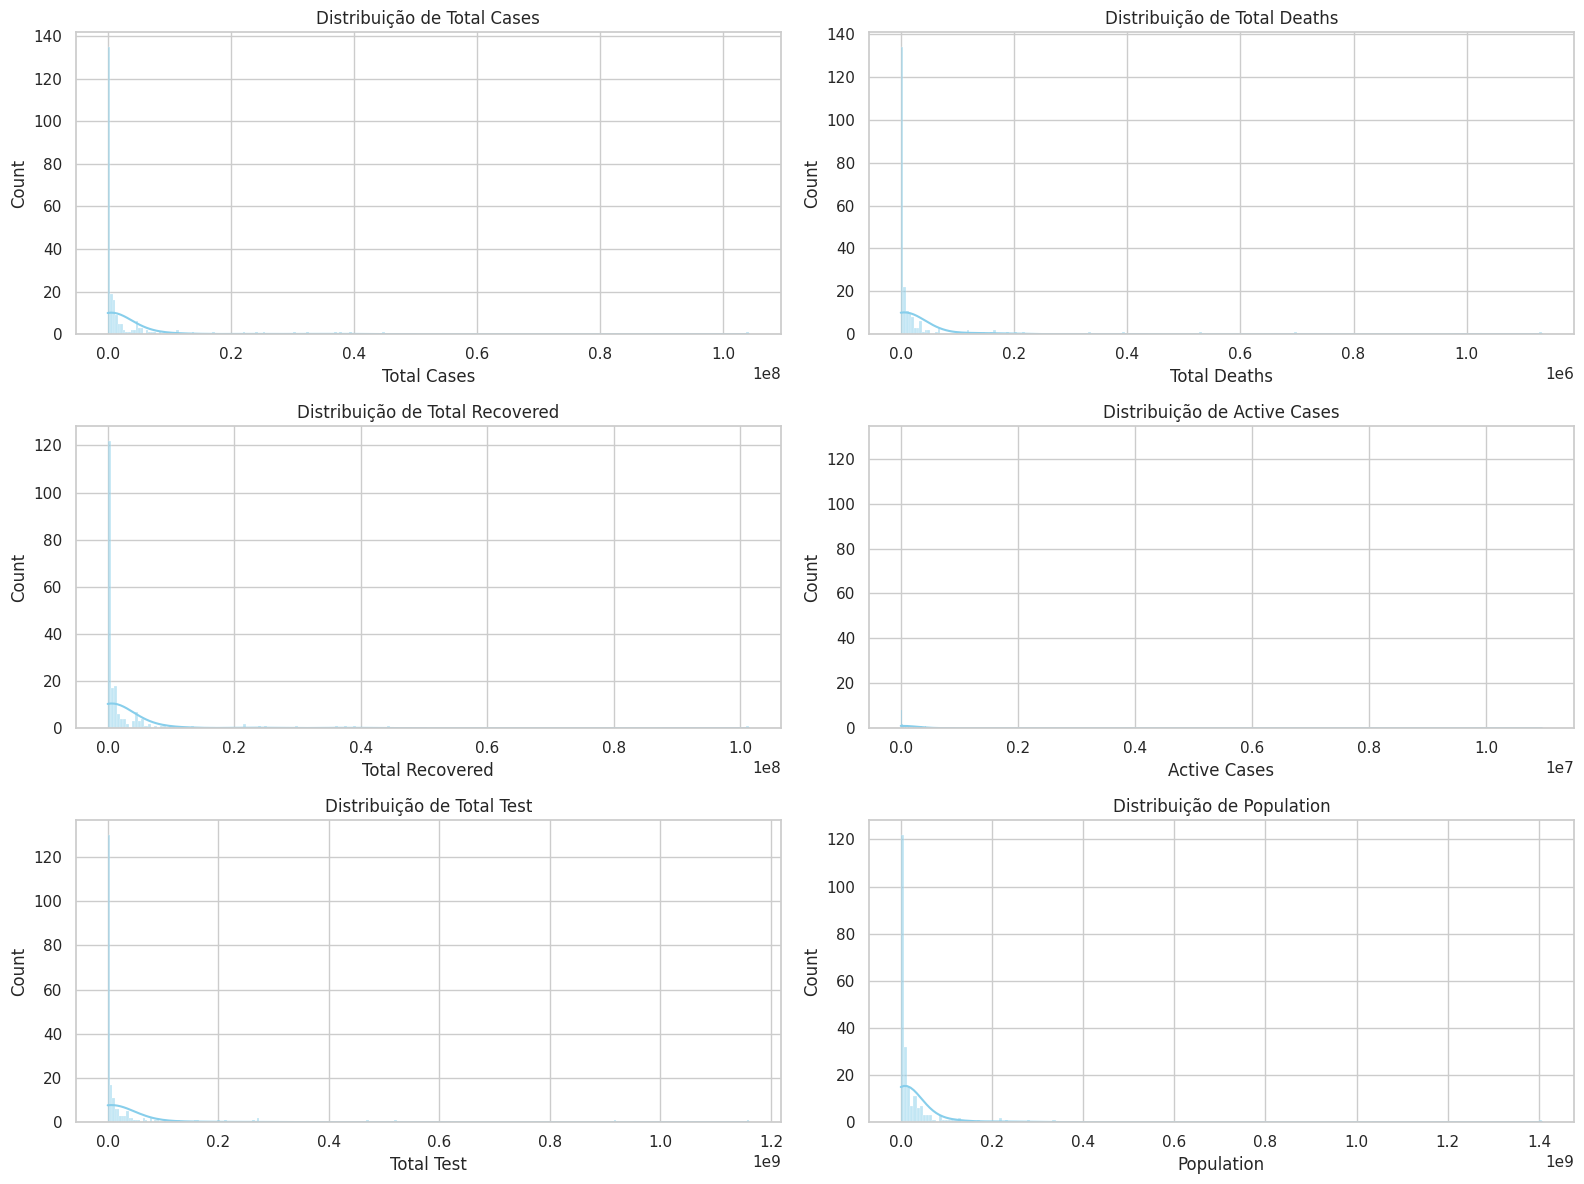

In [4]:
# Histogramas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribuição de {col}')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()


> As distribuições são assimétricas à direita (positivamente enviesadas), com poucos países concentrando a maioria dos valores altos. Isso indica a necessidade de normalizar os dados para comparações mais justas.


## 5.1 Visualizações Complementares

Nesta etapa, vou aprofundar a análise por meio de gráficos combinando variáveis numéricas e categóricas, como por exemplo:

- Top 10 países com mais casos e mortes
- Relação entre população e número total de casos
- Correlação entre testagem e casos confirmados
- Mapa de calor com a correlação entre variáveis


**Top 10 países com mais casos**

/tmp/ipython-input-6-2819783042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cases, y='Country', x='Total Cases', palette='Reds_r')


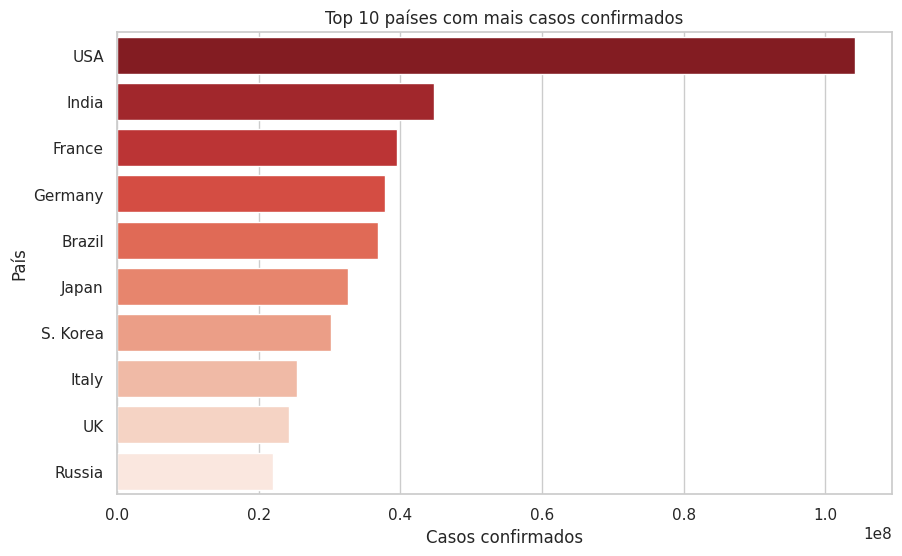

In [6]:
top_cases = df[['Country', 'Total Cases']].dropna().sort_values(by='Total Cases', ascending=False).head(10)

sns.barplot(data=top_cases, y='Country', x='Total Cases', palette='Reds_r')
plt.title('Top 10 países com mais casos confirmados')
plt.xlabel('Casos confirmados')
plt.ylabel('País')
plt.show()


> O gráfico mostra que os Estados Unidos lideram em número absoluto de casos confirmados, seguidos por Índia, Brasil e Rússia. Isso se deve, em parte, ao tamanho populacional desses países, mas também reflete a extensão da pandemia, a capacidade de testagem e a transparência dos dados. Países como França e Reino Unido também aparecem com números elevados, indicando forte impacto da pandemia na Europa Ocidental.


**Top 10 países com mais mortes**

/tmp/ipython-input-7-3835498147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_deaths, y='Country', x='Total Deaths', palette='Blues_r')


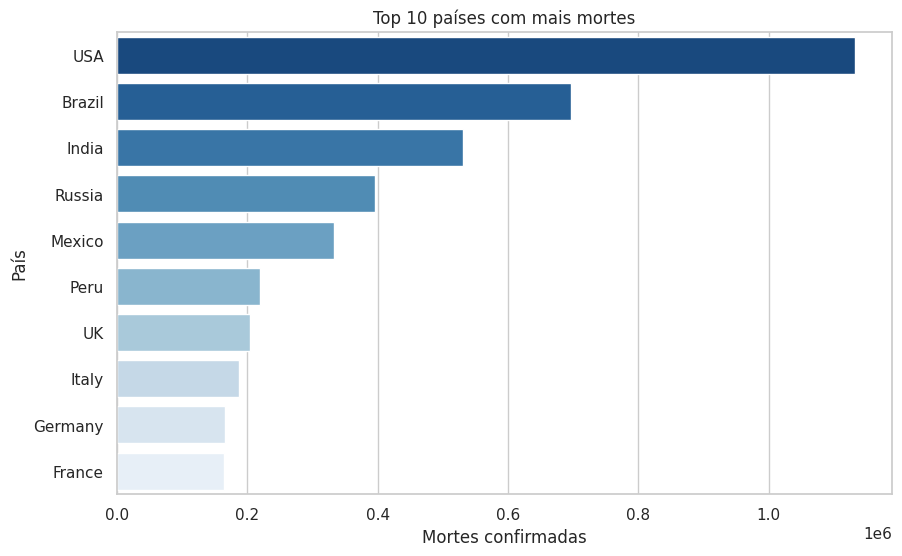

In [7]:
top_deaths = df[['Country', 'Total Deaths']].dropna().sort_values(by='Total Deaths', ascending=False).head(10)

sns.barplot(data=top_deaths, y='Country', x='Total Deaths', palette='Blues_r')
plt.title('Top 10 países com mais mortes')
plt.xlabel('Mortes confirmadas')
plt.ylabel('País')
plt.show()


> Novamente os Estados Unidos aparecem como o país com maior número absoluto de mortes por COVID-19, seguidos por Brasil e Índia. Esses dados devem ser interpretados com cautela, pois podem refletir não só a gravidade da pandemia, mas também fatores como estrutura hospitalar, subnotificação e políticas de saúde pública. Países com sistemas de saúde sobrecarregados tendem a ter mortalidade maior.


**Correlação entre testagem e casos**

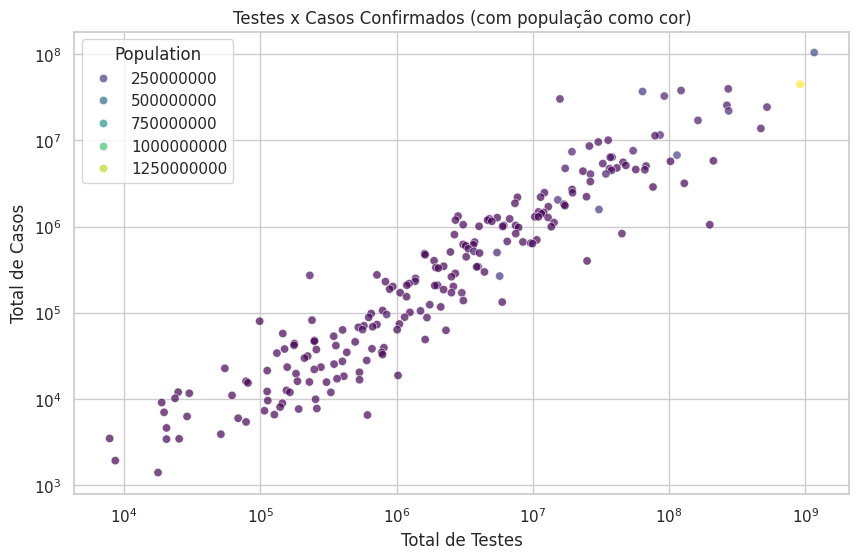

In [8]:
sns.scatterplot(data=df, x='Total Test', y='Total Cases', hue='Population', palette='viridis', alpha=0.7)
plt.title('Testes x Casos Confirmados (com população como cor)')
plt.xlabel('Total de Testes')
plt.ylabel('Total de Casos')
plt.xscale('log')
plt.yscale('log')
plt.show()


> A dispersão dos dados sugere uma correlação positiva entre o número de testes realizados e o número de casos detectados. Países com maior capacidade de testagem tendem a identificar mais casos, o que pode indicar uma resposta mais ativa ao controle da pandemia. Porém, também é possível que países com altas taxas de infecção tenham sido obrigados a testar mais. A escala logarítmica permite visualizar países com valores muito diferentes em uma mesma escala.


**Mapa de calor com correlação entre variáveis**

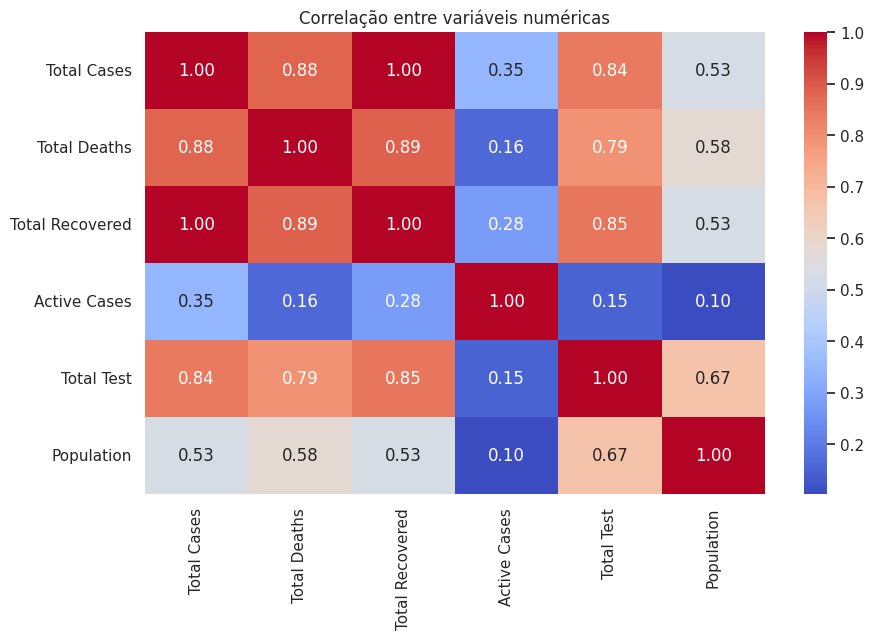

In [9]:
# Correlação
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()


> O mapa de calor mostra forte correlação entre:
- Total de casos e mortes
- Total de casos e casos ativos
- Testagem e casos (possivelmente por causa da detecção)

> Essas correlações reforçam a importância de considerar variáveis normalizadas por população para comparações mais precisas.


**População vs Casos (per capita)**

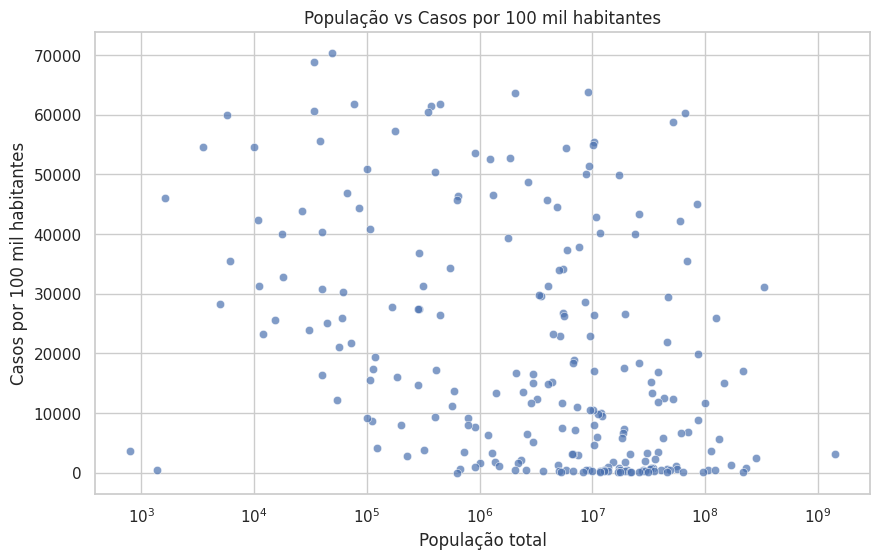

In [10]:
sns.scatterplot(data=df, x='Population', y='Total Cases per 100k', alpha=0.7)
plt.title('População vs Casos por 100 mil habitantes')
plt.xlabel('População total')
plt.ylabel('Casos por 100 mil habitantes')
plt.xscale('log')
plt.show()


> Esse gráfico mostra que países com populações pequenas também podem ter altas taxas per capita, o que seria invisível na análise por números absolutos.


## 5.2 Análises Combinadas e por Classe

**Gráfico:Casos x Mortes per capita com cor por gravidade**

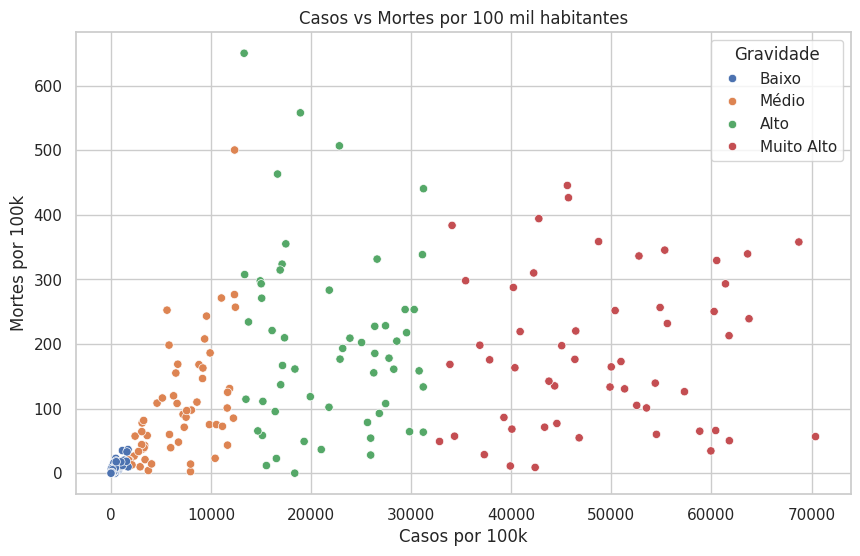

In [22]:
sns.scatterplot(data=df, x='Total Cases per 100k', y='Total Deaths per 100k', hue='Gravidade')
plt.title('Casos vs Mortes por 100 mil habitantes')
plt.xlabel('Casos por 100k')
plt.ylabel('Mortes por 100k')
plt.legend(title='Gravidade')
plt.show()


> Há uma relação positiva entre o número de casos e o número de mortes por 100 mil habitantes. Países classificados como de “Gravidade Muito Alta” concentram as maiores taxas de mortalidade, o que reforça a utilidade dessa variável para segmentações futuras.


**Gráfico: Frequência por nível de gravidade**

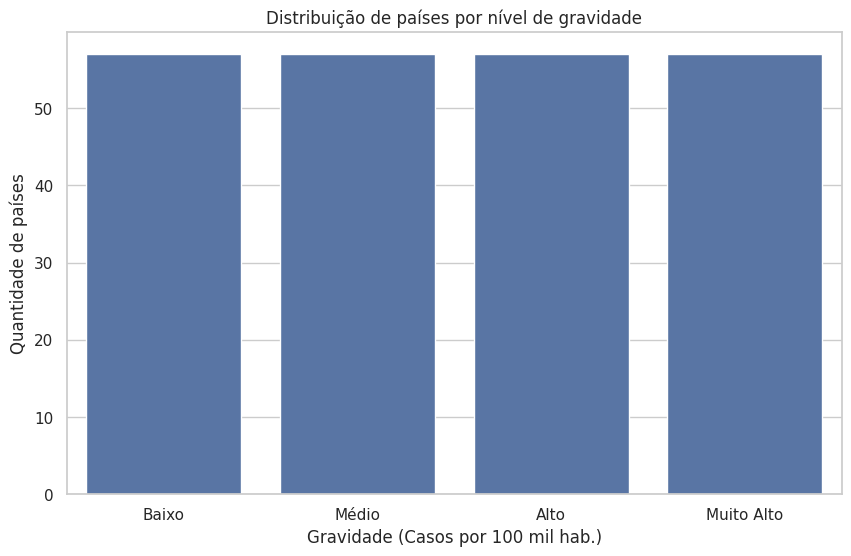

In [23]:
sns.countplot(x='Gravidade', data=df, order=['Baixo', 'Médio', 'Alto', 'Muito Alto'])
plt.title('Distribuição de países por nível de gravidade')
plt.xlabel('Gravidade (Casos por 100 mil hab.)')
plt.ylabel('Quantidade de países')
plt.show()


> A discretização baseada em quartis gerou uma divisão balanceada entre os países. Cada grupo possui cerca de 25% do total de registros, o que confirma que a técnica foi bem aplicada. Isso também facilita análises qualitativas e segmentações por grupo de risco.


## 6. CONCLUSÃO


A análise exploratória mostrou que a pandemia da COVID-19 afetou os países de forma bastante desigual. As diferenças em número de casos e mortes absolutas são marcantes, mas ao normalizar os dados pela população, identificamos países com situações críticas antes ocultas pelas médias gerais.

A criação de variáveis per capita, sua padronização e posterior discretização em faixas de gravidade possibilitaram interpretações mais precisas. Além disso, visualizações como boxplots e gráficos de dispersão revelaram padrões importantes, como a correlação entre testagem e número de casos, e entre casos e mortalidade.

O tratamento inicial dos dados foi essencial para permitir essas análises. A preparação cuidadosa permitiu que os dados brutos fossem transformados em informações úteis e acionáveis, demonstrando a importância do pré-processamento para qualquer projeto de ciência de dados.
